In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from patsy import dmatrices
import scipy.stats as stats
import pylab

In [4]:
f = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 1/forestfires.csv'
df = pd.read_csv(f)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [60]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15, 6))
    plt.suptitle('Quantile-quantile plot for Original data (None 0)', fontsize=22) # Add title here
    
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], kde=True, bins = 50, color = 'green')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    
    plt.show()


## Our target variable is 'area'

In [24]:
df['area'].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [5]:
df[df['area']> 100].value_counts()

X  Y  month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area   
1  2  sep    tue  91.0  129.5  692.6  7.0   18.8  40  2.2   0.0   212.88     1
2  2  aug    sat  93.7  231.1  715.1  8.4   21.9  42  2.2   0.0   174.63     1
      sep    sat  92.5  121.1  674.4  8.6   18.2  46  1.8   0.0   200.94     1
4  5  sep    sat  92.5  121.1  674.4  8.6   17.7  25  3.1   0.0   154.88     1
6  4  sep    tue  91.0  129.5  692.6  7.0   18.7  43  2.7   0.0   103.39     1
   5  sep    sat  92.5  121.1  674.4  8.6   25.1  27  4.0   0.0   1090.84    1
7  4  jul    mon  89.2  103.9  431.6  6.4   22.6  57  4.9   0.0   278.53     1
8  6  aug    sun  91.4  142.4  601.4  10.6  19.6  41  5.8   0.0   196.48     1
             thu  94.8  222.4  698.6  13.9  27.5  27  4.9   0.0   746.28     1
   8  aug    wed  91.7  191.4  635.9  7.8   26.2  36  4.5   0.0   185.76     1
9  4  sep    tue  84.4  73.4   671.9  3.2   24.3  36  3.1   0.0   105.66     1
dtype: int64

In [58]:
df[df['area'] == 0].value_counts()

X  Y  month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area  Area_log  Area_sqrt  Area_yoejohnson  Area_cube  Area_boxcox
4  3  aug    wed  92.1  111.2  654.1  9.6   20.4  42  4.9   0.0   0.0   0.0       0.0        -0.0             0.0        0.0            2
3  4  aug    sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.0   0.0       0.0        -0.0             0.0        0.0            2
   6  jun    fri  91.1  94.1   232.1  7.1   19.2  38  4.5   0.0   0.0   0.0       0.0        -0.0             0.0        0.0            2
6  5  aug    sat  90.2  96.9   624.2  8.9   14.7  59  5.8   0.0   0.0   0.0       0.0        -0.0             0.0        0.0            1
   3  sep    fri  94.3  85.1   692.3  15.9  25.4  24  3.6   0.0   0.0   0.0       0.0        -0.0             0.0        0.0            1
                                                                                                                                       ..
3  5  sep    fri  93.5  149.3  728.6  8

## Original Data
### The Skewness and Kurtosis of the original data

Skewness orginal area data:  12.85
Kurtosis orginal area data:  194.14


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



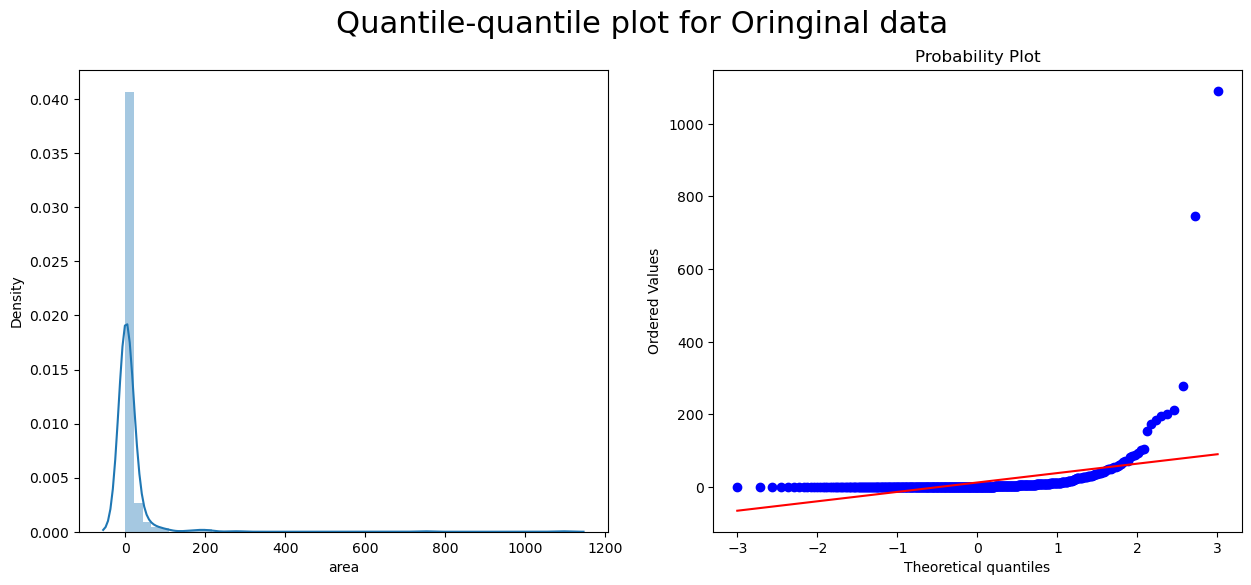

In [24]:
print('Skewness orginal area data: ', round(df['area'].skew(), 2))
print('Kurtosis orginal area data: ', round(df['area'].kurt(), 2))
diagnostic_plots(df, 'area')

## Log(n+1) transformation
### The Skewness and Kurtosis of the Log(n+1) transforma data

Skewness of ln(a+1) transform:  1.2178376559535011
Skewness of ln(a+1) transform:  0.9456680757207487


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



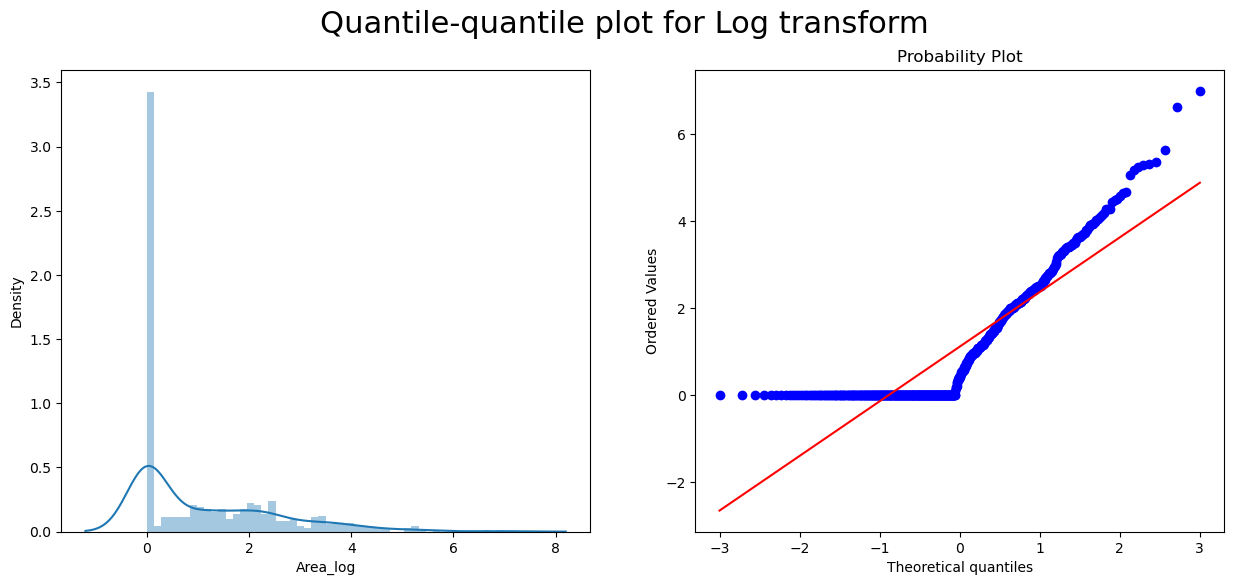

In [34]:
df['Area_log'] = np.log(df['area'] + 1 )
df['Area_log']

print('Skewness of ln(a+1) transform: ', df['Area_log'].skew())
print('Skewness of ln(a+1) transform: ', df['Area_log'].kurt())
diagnostic_plots(df, 'Area_log')

In [21]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

### Normalize and show the Skewness and Kurtosis of the Log(n+1) transforma data

Skewness of normalize ln(a+1) transform:  1.2178376559535016


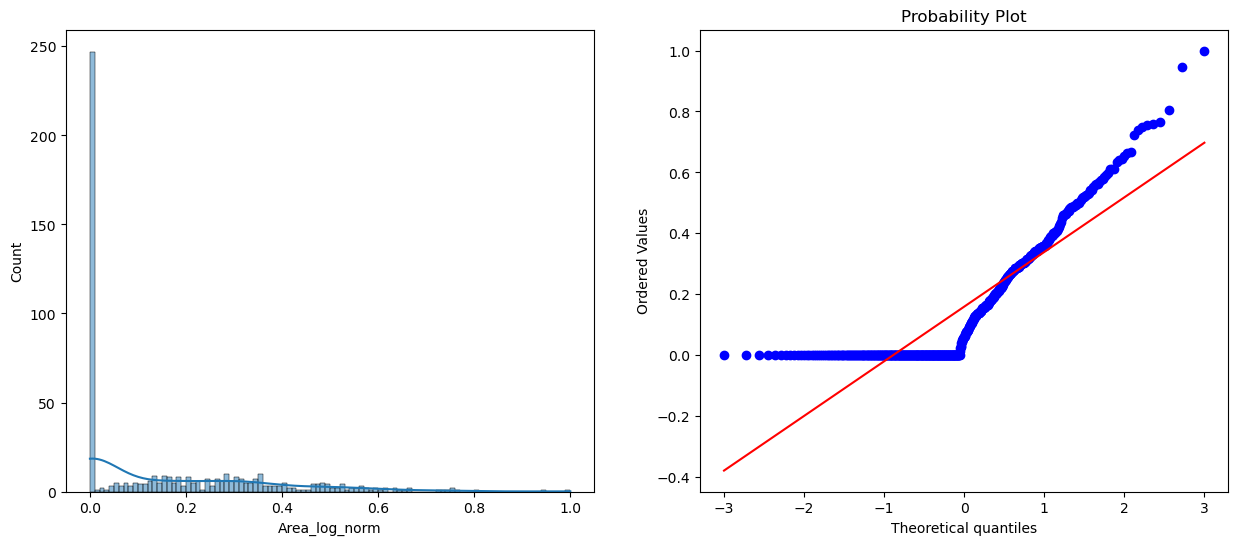

In [36]:
df['Area_log_norm'] = normalize(df['Area_log'])
df['Area_log_norm']
print('Skewness of normalize ln(a+1) transform: ', df['Area_log_norm'].skew())
diagnostic_plots(df, 'Area_log_norm')

In [54]:
df['Area_log_norm'].describe()

count    517.000000
mean       0.158817
std        0.199902
min        0.000000
25%        0.000000
50%        0.059853
75%        0.289352
max        1.000000
Name: Area_log_norm, dtype: float64

## SQRT transformation
### The Skewness and Kurtosis of the SQRT transforma data

Skewness of sqrt transform:  4.338705170518166
Skewness of sqrt transform:  30.745955665718963


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



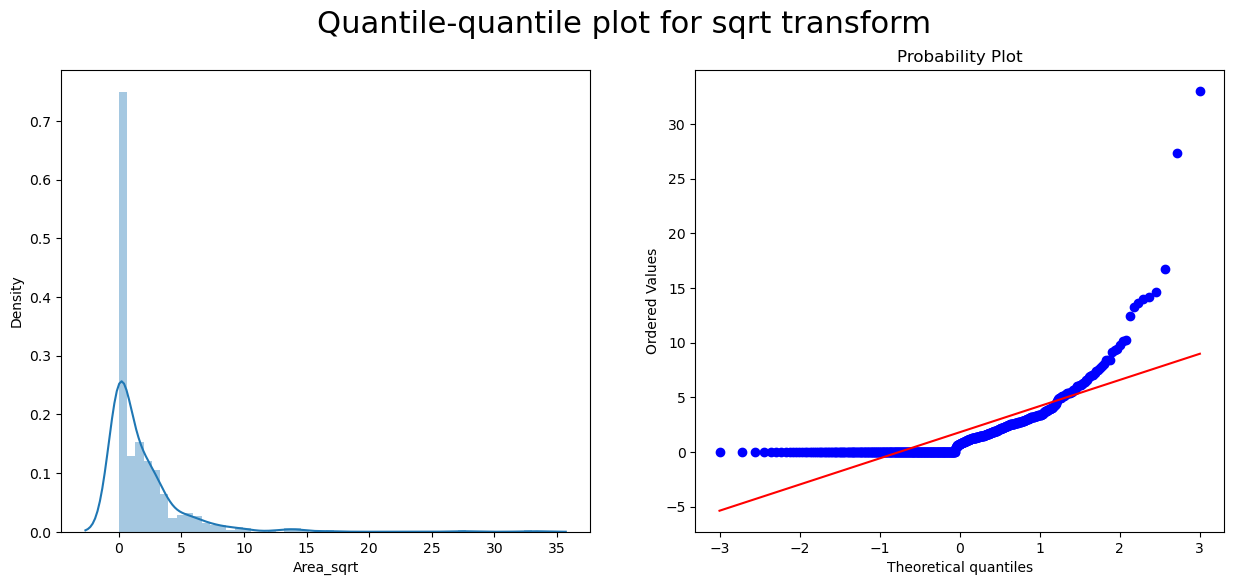

In [36]:
df['Area_sqrt'] = np.sqrt(df['area'])
print('Skewness of sqrt transform: ', df['Area_sqrt'].skew() )
print('Skewness of sqrt transform: ', df['Area_sqrt'].kurt() )
diagnostic_plots(df, 'Area_sqrt')

In [26]:
df['Area_sqrt'].describe()

count    517.000000
mean       1.800850
std        3.102071
min        0.000000
25%        0.000000
50%        0.721110
75%        2.563201
max       33.027867
Name: Area_sqrt, dtype: float64

Skewness of sqrt transform:  1.8336187780081352
Skewness of sqrt transform:  5.871277368873901


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



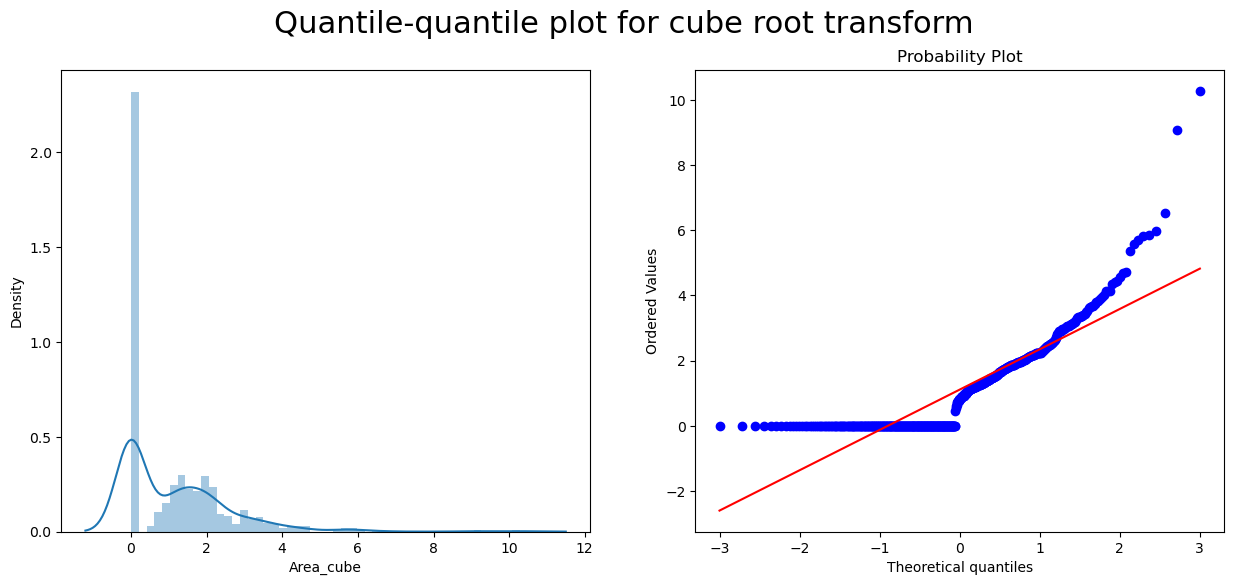

In [38]:
df['Area_cube'] = (df['area'])**(1/3)
print('Skewness of sqrt transform: ', df['Area_cube'].skew() )
print('Skewness of sqrt transform: ', df['Area_cube'].kurt() )
diagnostic_plots(df, 'Area_cube')

Optimal :  -0.5182787738852578
Skewness of YJ transform: 0.40210128209597273
Skewness of YJ transform: -1.4755771527735795


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



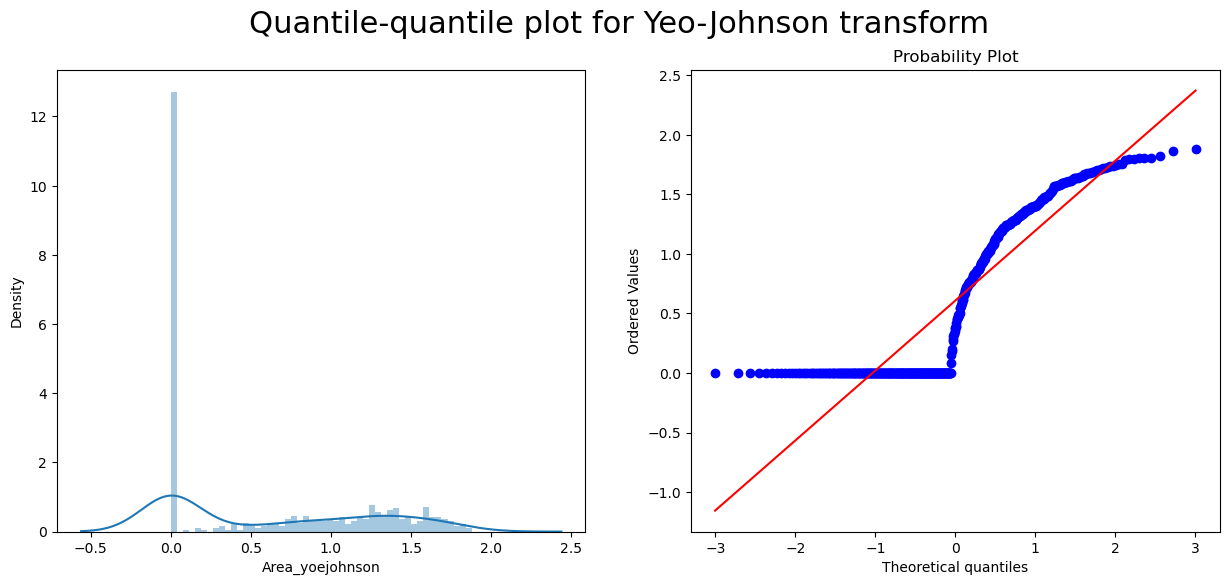

In [40]:
df['Area_yoejohnson'], param = stats.yeojohnson(df.area)
print('Optimal : ', param)
print('Skewness of YJ transform:', df['Area_yoejohnson'].skew())
print('Skewness of YJ transform:', df['Area_yoejohnson'].kurt())
diagnostic_plots(df, 'Area_yoejohnson')

Optimal :  -0.5182787890884529
0.4021012705147681


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



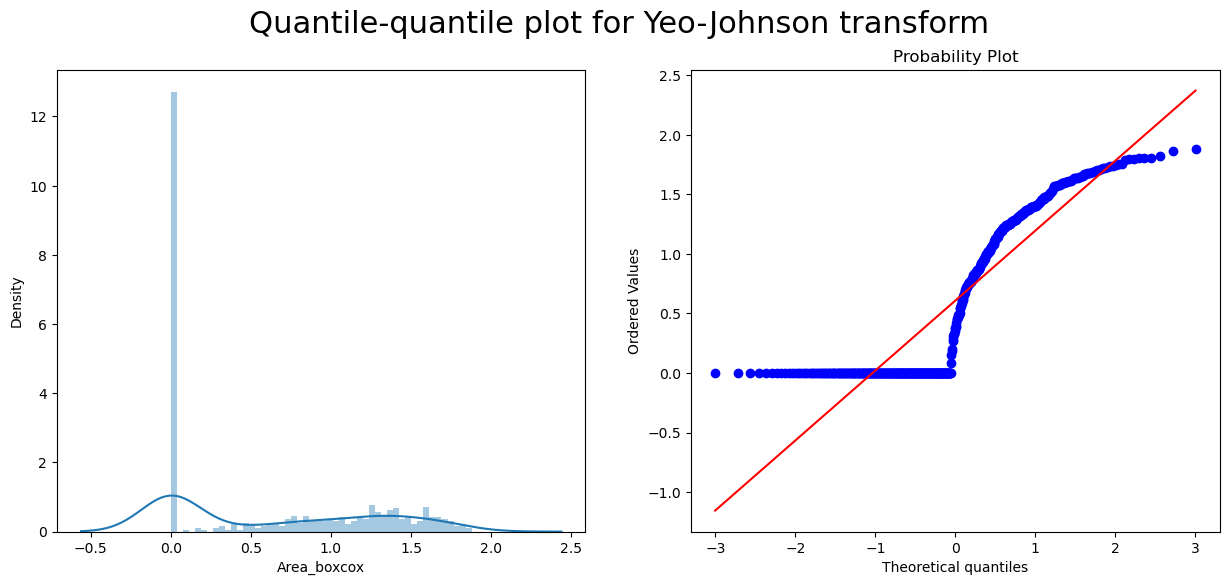

In [41]:
df['Area_boxcox'], param = stats.boxcox(df.area + 1)
print('Optimal : ', param)
print(df['Area_boxcox'].skew())
diagnostic_plots(df, 'Area_boxcox')

In [43]:
df_n0 = df[df['area'] > 0].copy()
df_n0

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Area_log,Area_sqrt,Area_yoejohnson,Area_cube,Area_boxcox
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,0.307485,0.600000,0.284235,0.711379,0.284235
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,0.357674,0.655744,0.326479,0.754784,0.326479
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0.385262,0.685565,0.349236,0.777498,0.349236
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,0.438255,0.741620,0.392046,0.819321,0.392046
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,0.476234,0.781025,0.422013,0.848093,0.422013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1.153732,1.473092,0.868383,1.294653,0.868383
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0.357674,0.655744,0.326479,0.754784,0.326479
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871,2.537716,1.247566,1.860495,1.247566
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592,7.368175,1.688329,3.786517,1.688329


Skewness orginal area data:  9.45
Kurtosis orginal area data:  103.74


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



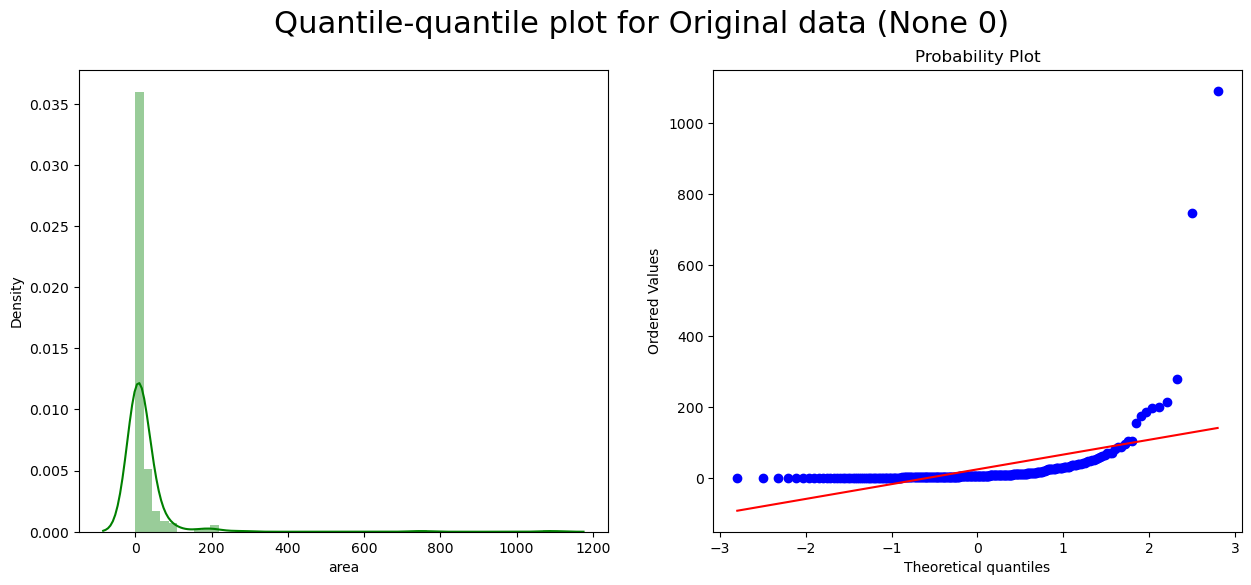

In [61]:
print('Skewness orginal area data: ', round(df_n0['area'].skew(), 2))
print('Kurtosis orginal area data: ', round(df_n0['area'].kurt(), 2))
diagnostic_plots(df_n0, 'area')

Skewness of ln(a+1) transform:  0.2998122023124438
Skewness of ln(a+1) transform:  0.3012286230408687


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



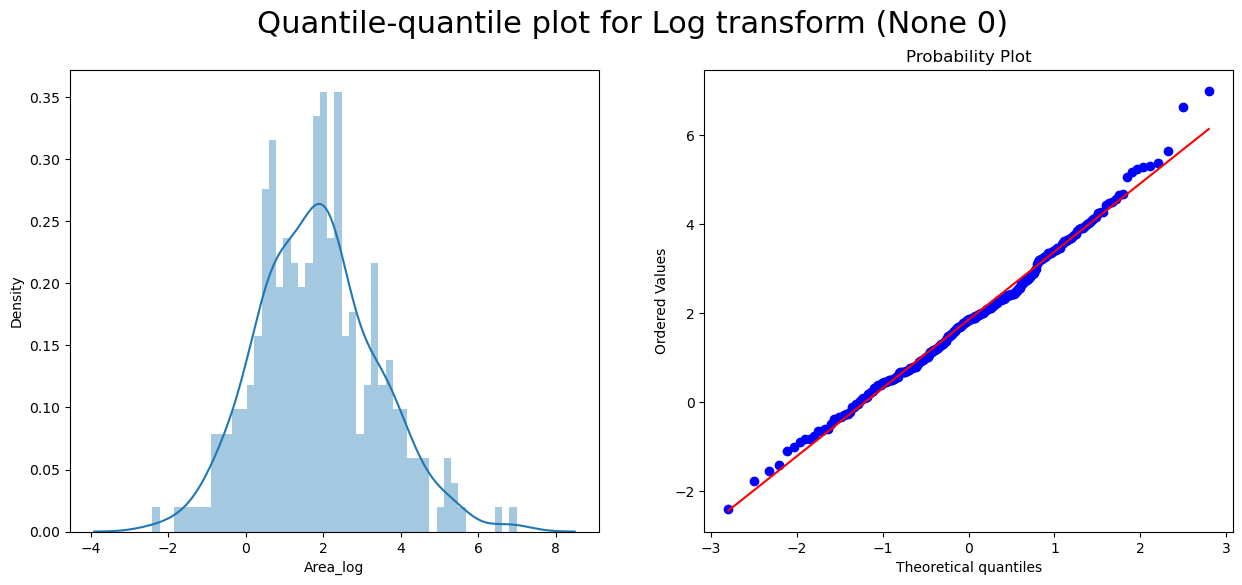

In [47]:
df_n0['Area_log'] = np.log(df_n0['area'])
df_n0['Area_log']

print('Skewness of ln(a+1) transform: ', df_n0['Area_log'].skew())
print('Skewness of ln(a+1) transform: ', df_n0['Area_log'].kurt())
diagnostic_plots(df_n0, 'Area_log')

Skewness of sqrt transform:  4.097310246857032
Skewness of sqrt transform:  25.12967175731022


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



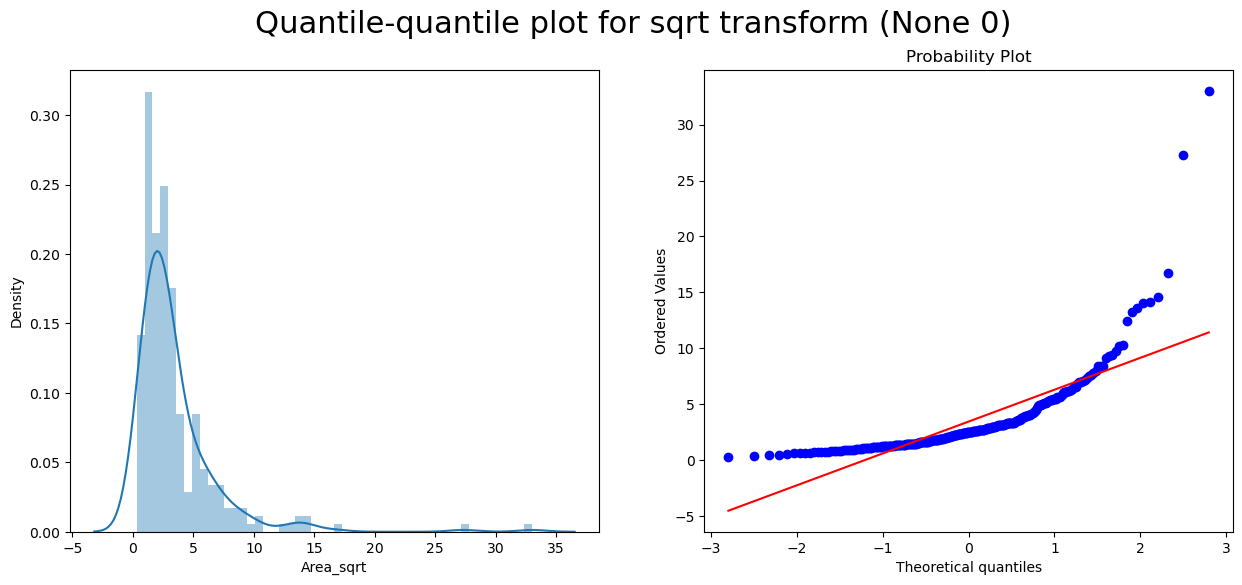

In [49]:
df_n0['Area_sqrt'] = np.sqrt(df_n0['area'])
print('Skewness of sqrt transform: ', df_n0['Area_sqrt'].skew() )
print('Skewness of sqrt transform: ', df_n0['Area_sqrt'].kurt() )
diagnostic_plots(df_n0, 'Area_sqrt')

Skewness of sqrt transform:  2.4498242044790626
Skewness of sqrt transform:  9.83994436314638


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



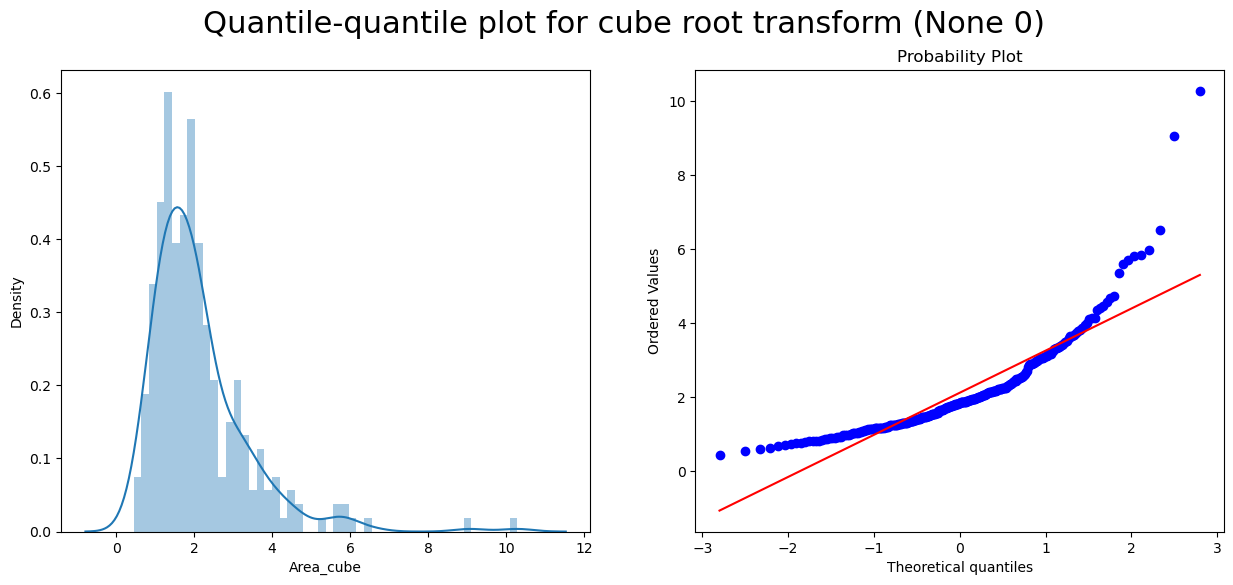

In [55]:
df_n0['Area_cube'] = df_n0['area']**(1/3)
print('Skewness of sqrt transform: ', df_n0['Area_cube'].skew() )
print('Skewness of sqrt transform: ', df_n0['Area_cube'].kurt() )
diagnostic_plots(df_n0, 'Area_cube')

Optimal :  -0.2702471416543092
Skewness of YJ transform: 0.0799906859426201
Skewness of YJ transform: -0.6682232357257272


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



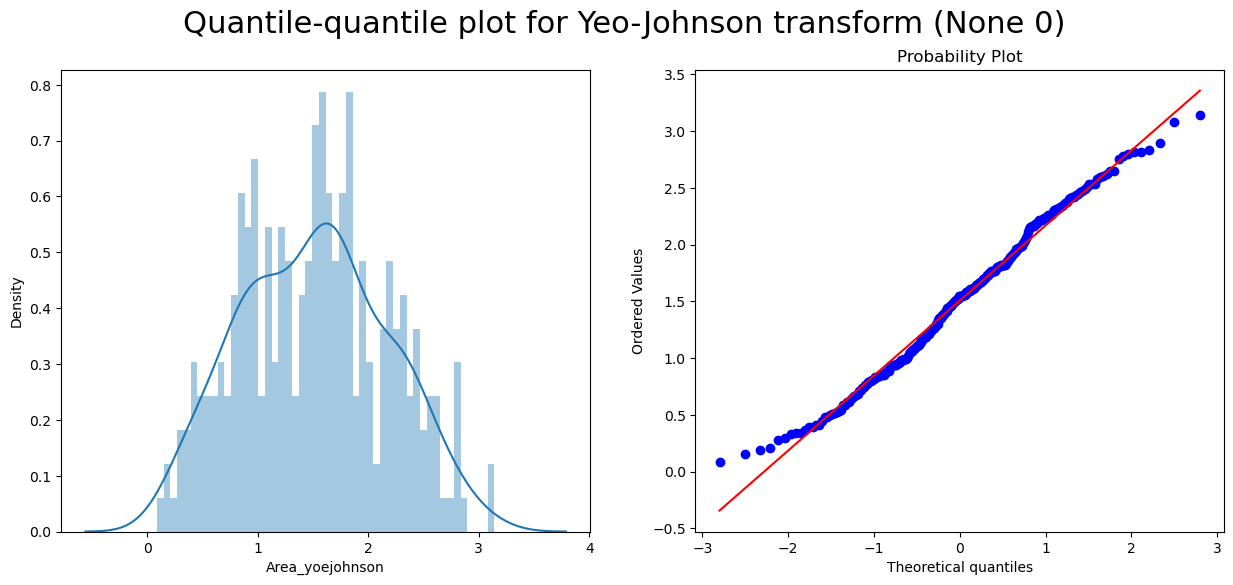

In [52]:
df_n0['Area_yoejohnson'], param = stats.yeojohnson(df_n0.area)
print('Optimal : ', param)
print('Skewness of YJ transform:', df_n0['Area_yoejohnson'].skew())
print('Skewness of YJ transform:', df_n0['Area_yoejohnson'].kurt())
diagnostic_plots(df_n0, 'Area_yoejohnson')

# Compared between SQRT and log(n+1) model

select_col = ['X', 'Y', 'FFMC', 'DMC', 'DC','ISI','temp','RH','wind', 'rain']
\\
outlier = ['FFMC', 'ISI', 'rain']
\\
cols = ['X', 'Y', 'DMC', 'DC', 'temp', 'RH', 'winds', 'rain']

# Log(n+1)

In [167]:
select_col = ['X', 'Y', 'month', 'day','FFMC', 'DMC', 'DC','ISI', 'temp', 'RH', 'wind', 'rain', 'area']
cols = ['X', 'Y', 'month', 'day', 'DMC', 'DC','ISI',  'temp', 'RH', 'wind']
num_cols = ['FFMC', 'DMC', 'DC','ISI', 'temp', 'RH', 'wind', 'rain', 'area']
outlier = ['FFMC', 'ISI', 'rain', 'area']

In [81]:
df[outlier].describe()

,FFMC,ISI,rain,area
count,517.000000,517.000000,517.000000,517.000000
mean,90.644681,9.021663,0.021663,12.847292
std,5.520111,4.559477,0.295959,63.655818
min,18.700000,0.000000,0.000000,0.000000
25%,90.200000,6.500000,0.000000,0.000000
50%,91.600000,8.400000,0.000000,0.520000
75%,92.900000,10.800000,0.000000,6.570000
max,96.200000,56.100000,6.400000,1090.840000


In [166]:
df_log = df.copy()

In [168]:
df_log[num_cols] = np.log1p(df_log[num_cols])
df_log[num_cols].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.515021,4.469552,6.041721,2.204023,2.935294,3.751048,1.547162,0.010535,1.111026
std,0.088019,0.844648,0.957204,0.474845,0.360899,0.352269,0.370837,0.108425,1.398436
min,2.980619,0.741937,2.186051,0.000000,1.163151,2.772589,0.336472,0.000000,0.000000
25%,4.513055,4.242765,6.083816,2.014903,2.803360,3.526361,1.308333,0.000000,0.000000
50%,4.528289,4.694096,6.500088,2.240710,3.010621,3.761200,1.609438,0.000000,0.418710
75%,4.542230,4.965638,6.572143,2.468100,3.169686,3.988984,1.774952,0.000000,2.024193
max,4.576771,5.677781,6.758791,4.044804,3.535145,4.615121,2.341806,2.001480,6.995620


In [87]:
df_log[outlier] = np.log1p(df_log[outlier])
df_log[outlier].describe()

,FFMC,ISI,rain,area
count,517.000000,517.000000,517.000000,517.000000
mean,4.515021,2.204023,0.010535,1.111026
std,0.088019,0.474845,0.108425,1.398436
min,2.980619,0.000000,0.000000,0.000000
25%,4.513055,2.014903,0.000000,0.000000
50%,4.528289,2.240710,0.000000,0.418710
75%,4.542230,2.468100,0.000000,2.024193
max,4.576771,4.044804,2.001480,6.995620


### STFWI
Spatial + Tempoal + FWI

Define Variables

In [169]:
# df = df.drop(['Area_log', 'Area_sqrt', 'Area_yoejohnson', 'Area_cube', 'Area_boxcox'], axis = 1)
df_log.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,4.515021,4.469552,6.041721,2.204023,2.935294,3.751048,1.547162,0.010535,1.111026
std,2.313778,1.229900,0.088019,0.844648,0.957204,0.474845,0.360899,0.352269,0.370837,0.108425,1.398436
min,1.000000,2.000000,2.980619,0.741937,2.186051,0.000000,1.163151,2.772589,0.336472,0.000000,0.000000
25%,3.000000,4.000000,4.513055,4.242765,6.083816,2.014903,2.803360,3.526361,1.308333,0.000000,0.000000
50%,4.000000,4.000000,4.528289,4.694096,6.500088,2.240710,3.010621,3.761200,1.609438,0.000000,0.418710
75%,7.000000,5.000000,4.542230,4.965638,6.572143,2.468100,3.169686,3.988984,1.774952,0.000000,2.024193
max,9.000000,9.000000,4.576771,5.677781,6.758791,4.044804,3.535145,4.615121,2.341806,2.001480,6.995620


In [25]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['X'], 
    y=df['Y'], 
    mode='markers', 
    marker=dict(
        size=10 * np.log1p(df['area']), 
        color='red', 
        opacity = 0.2),
    name='Burnt area'))

fig.update_layout(
    title={
        'text':'Burnt area in different regions of the park',
        'font': {'size': 40, 'family': 'Gulliver'},
        'x': 0.5
    },
    yaxis={
        'title': 'Y',
        'title_font': {'size': 32, 'family': 'Gulliver'},
    },
    width=1000,
    height=600,
)

fig.update_xaxes(
    title={
        'text': 'X',
        'font': {'size': 32, 'family': 'Gulliver'},
    }
)

fig.show()


In [97]:
model_stfwi = smf.ols("area ~ X + Y + month + day + FFMC + DMC + DC + ISI", data = df_log).fit()
    
print("Results for STFWI_log")
print(model_stfwi.summary())

Results for STFWI_log
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.385
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.111
Time:                        21:52:15   Log-Likelihood:                -890.28
No. Observations:                 517   AIC:                             1829.
Df Residuals:                     493   BIC:                             1931.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1761   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning:

divide by zero encountered in true_divide

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning:

invalid value encountered in subtract



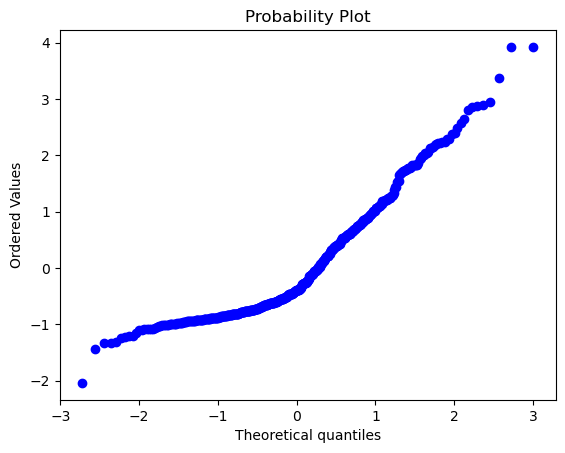

(1.3030810400182138, 0.019402756576743865)


In [98]:
st_resid = model_stfwi.get_influence().resid_studentized_internal
stats.probplot(st_resid,dist = "norm", plot = pylab)
plt.show()
print(sm.stats.diagnostic.linear_rainbow(model_stfwi))

In [123]:
linearity_test(model_stfwi, y) 

## ALL

In [93]:
model_all = smf.ols("area ~ X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + wind + rain", data = df_log ).fit()
    
print("Results for all_log")
print(model_all.summary())

Results for all_log
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.440
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0725
Time:                        21:49:56   Log-Likelihood:                -886.70
No. Observations:                 517   AIC:                             1829.
Df Residuals:                     489   BIC:                             1948.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6660     

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15, 6))
    plt.suptitle('Quantile-quantile plot for Original data (None 0)', fontsize=22) # Add title here
    
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], kde=True, bins = 50, color = 'green')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    
    plt.show()

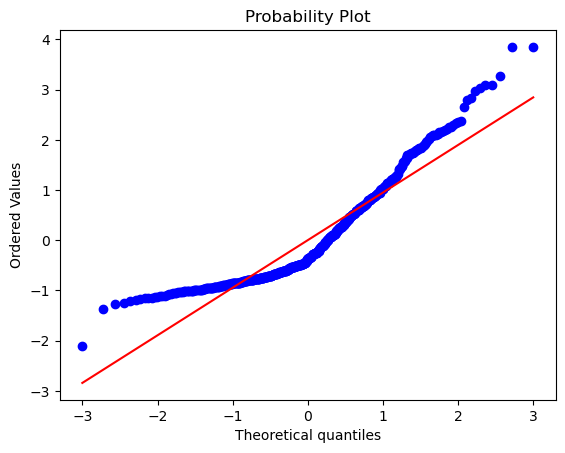

(1.0710820827764052, 0.29597472316811113)


In [96]:
st_resid = model_stm.get_influence().resid_studentized_internal
stats.probplot(st_resid,dist = "norm", plot = pylab)
plt.show()
print(sm.stats.diagnostic.linear_rainbow(model_stm))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning:

invalid value encountered in sqrt



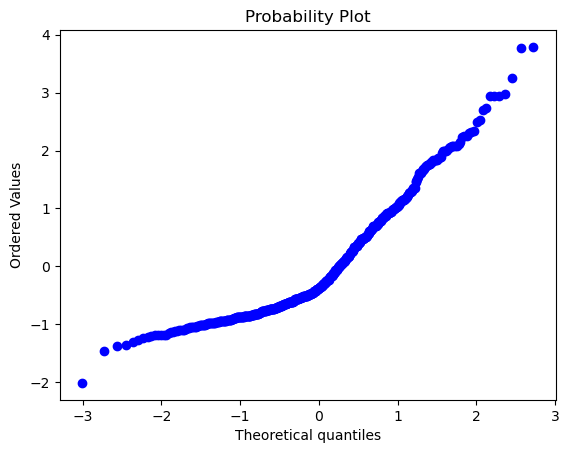

(1.3155373601667755, 0.01661446078017015)


In [94]:
st_resid = model_all.get_influence().resid_studentized_internal
stats.probplot(st_resid, dist = "norm", plot = pylab)
plt.show()
print(sm.stats.diagnostic.linear_rainbow(model_all))

In [129]:
linearity_test(model_all, y) 

## STM
Spatial + Temporal + Weather

In [125]:
model_stm = smf.ols("area ~ X + Y + month + day + temp + RH + wind + rain", data = df_log ).fit()
    
print("Results for STM_log")
print(model_stm.summary())

Results for STM_log
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.444
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0841
Time:                        23:04:51   Log-Likelihood:                -889.61
No. Observations:                 517   AIC:                             1827.
Df Residuals:                     493   BIC:                             1929.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3162     

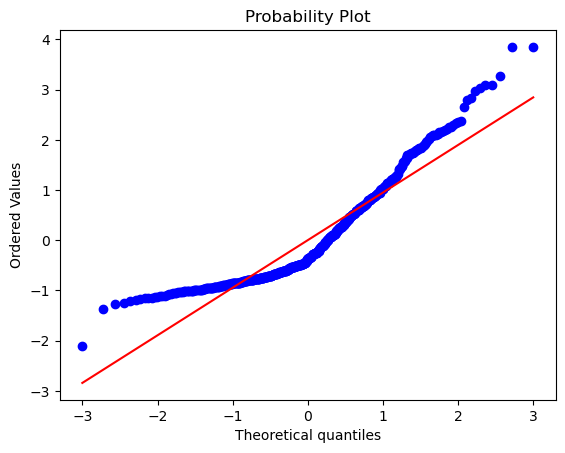

(1.0710820827764052, 0.29597472316811113)


In [92]:
st_resid = model_stm.get_influence().resid_studentized_internal
stats.probplot(st_resid,dist = "norm", plot = pylab)
plt.show()
print(sm.stats.diagnostic.linear_rainbow(model_stm))

In [126]:
linearity_test(model_stm, y) 

## FWI

In [127]:
model = smf.ols("area ~ FFMC + DMC + DC + ISI", data = df ).fit()
    
print("Results for FWI_log")
print(model.summary())

Results for FWI_log
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7820
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.537
Time:                        23:05:53   Log-Likelihood:                -2878.9
No. Observations:                 517   AIC:                             5768.
Df Residuals:                     512   BIC:                             5789.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.7883     52.463

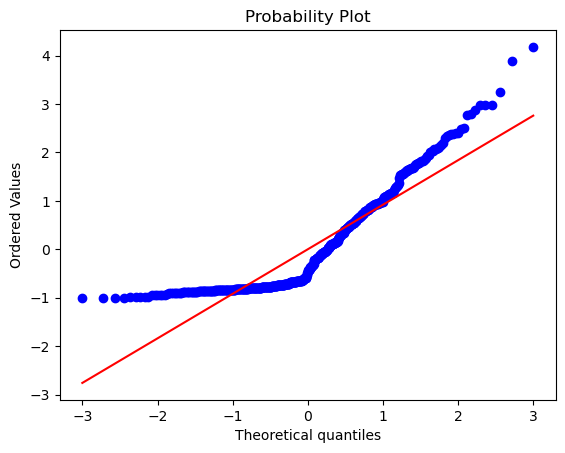

(0.9794426550866823, 0.566115480854269)


In [88]:
st_resid = model.get_influence().resid_studentized_internal
stats.probplot(st_resid,dist = "norm", plot = pylab)
plt.show()
print(sm.stats.diagnostic.linear_rainbow(model))

In [128]:
linearity_test(model, y) 

## M
which is the important variables provided by paper

In [124]:
model_m = smf.ols("area ~ temp + RH + wind + rain", data = df_log ).fit()
    
print("Results for M_log")
print(model_m.summary())

Results for M_log
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.314
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.263
Time:                        23:01:51   Log-Likelihood:                -903.83
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     512   BIC:                             1839.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6889      0.448  

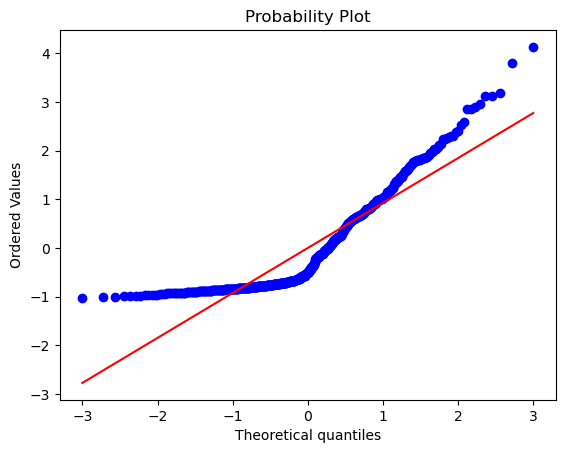

(1.0184803154529436, 0.44202182159382847)


In [106]:
st_resid = model_m.get_influence().resid_studentized_internal
stats.probplot(st_resid,dist = "norm", plot = pylab)
plt.show()
print(sm.stats.diagnostic.linear_rainbow(model_m))


In [122]:
import plotly.graph_objs as go
import plotly.express as px

def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=fitted_vals, y=y,
                             mode='markers',
                             name='Observed',
                             marker=dict(color='blue')
                            ))

    fig.add_trace(go.Scatter(x=fitted_vals, y=fitted_vals,
                             mode='lines',
                             name='Fitted',
                             line=dict(color='red')
                            ))

    fig.update_layout(title={
                      'font':{'size':32},
                      'text':'Observed vs. Predicted Values'},
                      xaxis_title=
                       {
                        'font':{'size':20},
                        'text':'Predicted'},
                       yaxis_title={
                        'font':{'size':20},
                        'text':'Observed'},)

    fig.show()

    fig2 = go.Figure()

    fig2.add_trace(go.Scatter(x=fitted_vals, y=resids,
                              mode='markers',
                              name='Residuals',
                              marker=dict(color='blue')
                             ))

    fig2.add_trace(go.Scatter(x=fitted_vals, y=[0]*len(fitted_vals),
                              mode='lines',
                              name='Zero',
                              line=dict(color='red')
                             ))

    fig2.update_layout(title={
                        'font':{'size': 32},
                       'text':'Residuals vs. Predicted Values'},
                       xaxis_title=
                       {
                        'font':{'size':20},
                        'text':'Predicted'},
                       yaxis_title={
                        'font':{'size':20},
                        'text':'Residuals'},)

    fig2.show()
linearity_test(model_m, y) 
plt.tight_layout()

<Figure size 640x480 with 0 Axes>